# Week 4 :



# Problem Statement : 

The problem is to perform sentiment analysis on twitter tweets.And in the train dataset we have two columns 1st the text which contains the tweets and the 2nd with the sentiment of the respective tweet either Positive,Negative or Neutral.And in the validation dataset we have only the text column . Our task is to classify each tweet into either positive,negative or neutral.So for this we have to perform various text mining techniques to make the machine understand the human language.And feed the model with some important words that influence the sentiment of a particular tweet.And perform sentiment analysis on data that the model have never seen.

Dealing with the text data:

When it is text data the main task is not about choosing the model,rather choosing the best way to deal with text mining.The more deep you deal with the text cleaning,the more it is going to speak.
So there are various methods to deal with text data such as : 

1)n-grams
2)TF(Term Frequency)
3)IDF(Inverse Document Frequency)
4)Bag of Words
5)Word Embedding

Among all these each have their own way to deal with data and it completely depends on the person to choose.



# Model 1 :

For the model 1 I have chosen the Bag of words.

Bag of words : Bag of Words model is used to preprocess the text by converting it into a bag of words, which keeps a count of the total occurrences of most frequently used words.

TF-IDF : Tf–idf means term frequency–inverse document frequency,it is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

Corpus :  Corpus refers to a collection of texts. Such collections may be formed of a single language of texts, or can span multiple languages


# Importing the libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Importing the dataset

In [6]:
dataset = pd.read_csv('train.csv')
dataset=dataset.dropna()

In [7]:
dataset.shape

(27447, 2)

In [8]:
dataset['sentiment'].replace(('negative','neutral','positive'), (2,0,1), inplace=True)

In [9]:
counts=dataset['sentiment'].value_counts()
counts

0    11105
1     8575
2     7767
Name: sentiment, dtype: int64

# The Positives,Negatives and Neutrals number doesn't differ alot

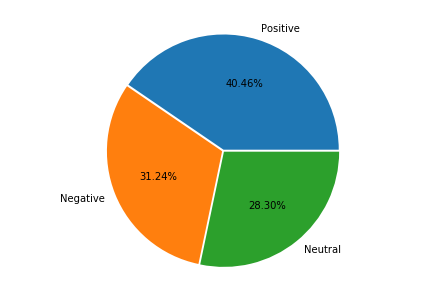

In [10]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
lab = ['Positive','Negative','Neutral']
ax.pie(counts,labels=lab,autopct='%1.2f%%',explode=(0.01,0.01,0.01))
plt.show()

# Cleaning the texts

In [11]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\perla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus = []
for i in range(0,27447):
    review = re.sub("[^a-zA-Z]", " ", str(dataset.text))
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

# Creating the Bag of Words model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=500)
cv.fit(corpus)
X = cv.transform(corpus).toarray()
y = dataset.iloc[:, 1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset['text'], dataset['sentiment'],test_size=0.20 ,random_state = 123)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer()
tfidf_trans=tfidf_transformer.fit_transform(X)
tfidf_trans=tfidf_trans.toarray()

In [ ]:
#For train set
count_vect = CountVectorizer(max_features=9693)
X_train_counts = count_vect.fit_transform(X_train)
tfidf_trans= TfidfTransformer()
X_train_tfidf = tfidf_trans.fit_transform(X_train_counts).toarray()

#for test set
X_test_counts = count_vect.fit_transform(X_test)
tfidf_trans = TfidfTransformer()
X_test_tfidf = tfidf_trans.fit_transform(X_test_counts).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
y_pred = clf.predict(X_test_tfidf)

In [ ]:
X_test_tfidf.shape

(5490, 9693)

In [ ]:
y_train.shape,y_test.shape,X_test_tfidf.shape,X_train_tfidf.shape

((21957,), (5490,), (5490, 9693), (21957, 9693))

In [ ]:
X_train_tfidf.shape,X_test_tfidf.shape,y_test.shape,y_pred.shape

((21957, 9693), (5490, 9693), (5490,), (5490,))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1021,  560,  605],
       [ 719,  509,  476],
       [ 706,  392,  502]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.37012750455373405

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.47      0.44      2186
           1       0.35      0.30      0.32      1704
           2       0.32      0.31      0.32      1600

    accuracy                           0.37      5490
   macro avg       0.36      0.36      0.36      5490
weighted avg       0.37      0.37      0.37      5490



# The Accuracy is very poor and the time taken is also too long  so I have used a different approach in the text mining part in the next model

# Model 2 :

From the 1st model we found that the model have taken a bit more time to execute and the accuracy is also poor.So lets put our primary goal to improve the accuracy.So making some changes to the previous model. Let us apply a different technique in dealing with the text data.

In this model we will use Stemming and Lemmatization method for our text mining purpose.

Stemming : stemming is the process of reducing inflected words to their word stem, base or root form.


Lemmatization : Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\perla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\perla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\perla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
data1=pd.read_csv('train.csv')
print(data1.isna().sum())
data1=data1.dropna()

text         1
sentiment    0
dtype: int64


In [13]:
tokens=nltk.word_tokenize(data1.text[1])
print(tokens)

['Playing', 'Ghost', 'Online', 'is', 'really', 'interesting', '.', 'The', 'new', 'updates', 'are', 'Kirin', 'pet', 'and', 'Metamorph', 'for', 'third', 'job', '.', 'Can', '`', 't', 'wait', 'to', 'have', 'a', 'dragon', 'pet']


In [14]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(data1.text[1])
print(tokenized_word)

['Playing', 'Ghost', 'Online', 'is', 'really', 'interesting', '.', 'The', 'new', 'updates', 'are', 'Kirin', 'pet', 'and', 'Metamorph', 'for', 'third', 'job', '.', 'Can', '`', 't', 'wait', 'to', 'have', 'a', 'dragon', 'pet']


In [15]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = data1.text[1]
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: Playing Ghost Online is really interesting. The new updates are Kirin pet and Metamorph for third job.  Can`t wait to have a dragon pet
Stemmed Word: playing ghost online is really interesting. the new updates are kirin pet and metamorph for third job.  can`t wait to have a dragon pet


In [16]:
from nltk.tokenize import sent_tokenize
text=data1.text[2]
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['is cleaning the house for her family who is comming later today..']


In [17]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['is', 'cleaning', 'the', 'house', 'for', 'her', 'family', 'who', 'is', 'comming', 'later', 'today..']


In [18]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 11 samples and 12 outcomes>


In [19]:
fdist.most_common()

[('is', 2),
 ('cleaning', 1),
 ('the', 1),
 ('house', 1),
 ('for', 1),
 ('her', 1),
 ('family', 1),
 ('who', 1),
 ('comming', 1),
 ('later', 1),
 ('today..', 1)]

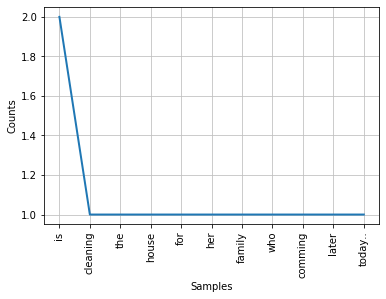

In [20]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [21]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'did', 'a', 'my', 'couldn', 'down', 'most', 'your', 'had', 'both', 'didn', 'for', 'mustn', 'this', 'why', 'can', 'all', "wouldn't", 'their', 'an', "mightn't", 'is', "you've", 'her', "you'll", 'ours', 'not', 're', 'now', 'were', 'am', 'because', 'which', 'at', 'other', 'where', 'above', 'more', "haven't", "needn't", 'himself', 'have', 'him', 'these', 'and', "aren't", 'of', 'aren', 'you', 'further', 'few', 'ma', 'she', 'nor', 'the', 'should', 'between', 'off', "that'll", 'from', 'then', 'those', 'ourselves', 'having', 'his', 'into', 'any', "it's", 'itself', 'than', 'whom', 'does', 'so', "hadn't", 'has', "didn't", 'don', "weren't", "mustn't", "you'd", 'during', 'there', 'weren', 'here', 'out', 'who', 'been', 'through', 'again', "she's", 'in', "wasn't", 'me', 'its', 'them', "shouldn't", 'such', 've', 'hers', 'wouldn', 'once', 'after', 'as', 'll', 't', "should've", 'what', 'isn', 'being', 'theirs', 'doing', 's', 'needn', 'over', 'by', 'some', 'below', 'until', "couldn't", 'are', 'or', 'eac

# The above printed words are the Stopwords and these words are ignored in the analysis when they appear in a tweet

In [22]:
tokenized_sent = tokenized_word

In [23]:
filtered_sent=[]
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_sent)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['is', 'cleaning', 'the', 'house', 'for', 'her', 'family', 'who', 'is', 'comming', 'later', 'today..']
Filterd Sentence: ['cleaning', 'house', 'family', 'comming', 'later', 'today..']


In [25]:
from scipy import sparse
import re
from collections import Counter
import ast # to transform str to dic
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords # Import the stop word list
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

# Working with each tweet to know how various methods can simplify the text

In [26]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['cleaning', 'house', 'family', 'comming', 'later', 'today..']
Stemmed Sentence: ['clean', 'hous', 'famili', 'com', 'later', 'today..']


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data1['text'])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, data1['sentiment'], test_size=0.3, random_state=1)

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(X_train, y_train)
y_pred= clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.6438372799028537

In [30]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

The good thing here is that the accuracy had improved and the time taken to execute was also less when compared to the 1st model.And this code was taken from data camp:
https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk

And this code also had some techniques to handle text data,find the frequency of each word in a sentence.Stemming ,POS Tagging(Parts of Speech) for each sentence.
All the techniques were not implemented in the model but some changes were made when compared to the previous model.




# Model 3 :

For the 3rd model I have used XGBoost and the resulting accuracy had increased to 69.35% approx 70% .

XGBoost : XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.It can be used to solve regression, classification, ranking, and user-defined prediction problems.
Validation strategies and accuracy :


In [32]:
import xgboost
from xgboost import XGBClassifier
classifier = XGBClassifier(default='gbtree',learning_rate=0.5,random_state=123,max_depth=5,subsample=0.5,tree_method='exact',grow_policy='lossguide',max_leaves=5,predictor='cpu_predictor',tweedie_variance_power=2)
classifier.fit(X_train, y_train)

[12:48:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { default, tweedie_variance_power } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, default='gbtree', gamma=0,
              gpu_id=-1, grow_policy='lossguide', importance_type='gain',
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=5, max_leaves=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob',
              predictor='cpu_predictor', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', tweedie_variance_power=2, ...)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1249  953  164]
 [ 329 2597  385]
 [  82  624 1852]]


0.6919247115968428

# KFold Cross Validation

Cross-validation is a statistical method used to estimate the skill of machine learning models.

In [40]:
kf = KFold(n_splits=4,shuffle=True)
kf.split(data1)    
     
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
accuracy_model = []
 
# Iterate over each train-test split
for train_index, test_index in kf.split(data1):
    # Split train-test
    X_train, X_test, y_train, y_test = train_test_split(text_counts, data1['sentiment'], test_size=0.20, random_state=1)
    # Train the model
    model = classifier.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)

# Print the accuracy    
print(accuracy_model)

[13:07:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { default, tweedie_variance_power } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:07:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { default, tweedie_variance_power } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:07:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { default, tweedie_variance_power } might not be used.

  This may n

# How would you like to improve your model/accuracies?

I would like to implement n-grams model for this problem and there are some factors to ensure before going to that as it involves lot of memory to compute.And we need to make sure to execute it on a cloud instead of a local device.So I wish I could implement that in the coming future. 


# N-Gram Model
The N-gram graph classification model combines the benefits of N-gram flexibility with the well-structured representation of directed graphs. Every extracted letter sequence from a text can be formed as N-gram and the relation of these N-grams can be reflected using a Graph. The text classification problem can be reduced in a graph theory and pattern matching problem. The use of NGG model overcomes some limitations of the Bag of Words model such as the word order omission and misspelling . The mapping of texts to N-gram graphs and the comparison between them reduces the dimensionality of the feature space and as consequence, it also reduces the complexity of the classification method.

# Research on state-of-the-art Sentiment Analysis :

Sentiment Analysis is one of the most active research areas in Natural Language Processing, but it’s far from being a solved problem. It involves a deep understanding of the lexical, syntactic, and semantic rules of a language combined with background knowledge.  The intrinsic complexity of natural language and new challenging sentiment analysis tasks all with the big data paradigm in the background mean that there are more than ever fascinating research perspectives in affective language understanding. The ones I find most inspiring are the complex problems of detecting implicit sentiments and emotions, being able to handle multiple languages, deception detection, real time event analytics and the automated acquisition of common sense, world and contextual knowledge.


# Research by Amazon : 
To this end, Amazon scientists sought to train an NLP model to select answers to questions from a set of answer candidates better than a baseline. They say their Transfer and Adapt (TANDA) approach, which builds on Google’s Transformer, can be effectively adapted to new domains with a small amount of training data while achieving higher accuracy than traditional techniques.




# TANDA:
It is a two-part training methodology that adapts the Transformer model to a question-answering task and  tailors it to specific types of questions and answers. A large-scale, general-purpose data set — Answer Sentence Natural Questions, or ASNQ — is used to prime the system, after which a fine-tuning step adapts it to a target domain. As the researchers explain.

# ASNQ : 
It is derived from the Google Natural Questions data set — is much larger in size than existing corpora of its kind, with 57,242 questions in a set used for training the AI models and 2,672 questions in a validation set. And it contains negative examples in addition to positive examples, which help the model learn to identify best answers to given questions out of similar but incorrect ones.

# https://www.researchgate.net/publication/321150349_Using_Text_Mining_Techniques_for_Extracting_Information_from_Research_Articles


You can also go through the above research paper to know various methods to deal with text data instead of just going to classification.

In [57]:
Accuracy_report

,0
Naive Bayes(Bag of Words),37
Naive Bayes(Stemming),64
XGBoost,70


# Challanges :

It was a tough work as I was new to NLP but I was happy to come up to this extent on my own.And there are many problems and I have solved most of them.But one thing that I would like to change is to make the stemming process clear as some of  the words obtained after performing stemming doesn't even exist in English.So I have to try using some other method that has some predefined words while performing stemming.